# 第１２回　多次元データの解析　（１）相関分析・回帰分析

今回は、次のような内容を取扱います。  
- 相関について
- 相関分析、相関係数
- 回帰分析（単回帰分析、重回帰分析）
- （補）分散分析

また、今回はとくに次のツールを使います。
- 散布図マトリクスを描くためにmlxtendを（参考として）。
- 散布図マトリクスを描くためにseabornを。
- 線形回帰を行うためにstatsmodelsを。
- 残差診断のためにlmdiagを（参考として）。

## 相関について

### 散布図を描く

散布図は相関(correlation)を調べるための最初のステップとして重要です。  
散布図を描いてみましょう。  
ここでは、次のことをおこないます。
- Numpy とPandasのインポート
- データフレームとしてCSVファイルを読み込む
- matplotlibのインライン宣言とインポート
- mlextendを利用した散布図の描画（参考）
- seabornによる散布図の描画

まず、NumPyとPandasのインポートをおこないます。今回主に使うのはPandasのほうです。

In [1]:
import numpy as np
import pandas as pd

日本統計学会編「改訂版　統計学基礎」（東京図書）の第１章で使われる家賃データをpandas.read_csv()関数を用いてCSVファイルから読み込みます。  
東京図書のWebサイトからダウンロードしたファイルの先頭行はそれぞれの部屋の属性を表します。すなわち、駅からの近さ、家賃、間取り、広さ、部屋の向き、そして築年数です。読み込むファイルではこれらは英語に直してあります。  
また、保存するファイルのエンコーディング形式はUTF-8 (別名で保存するときに、UTF-8 CSV形式を選びます）としました。もともとはShift-JIS形式で作られていました。

In [26]:
df_room = pd.read_csv('room-utf8.csv')

読み込むと、「**データフレーム**」ができます。第４回で説明したように、データフレームでは各列に項目名でアクセスできます。

In [4]:
df_room

,proximity,rent,plan,size,direction,age
0,B,68000,1K,19,W,12
1,B,68000,1K,19,S,12
2,B,69000,1K,19,NW,14
3,B,70000,1K,19,S,14
4,B,72000,1K,15,S,9
...,...,...,...,...,...,...
135,B,145000,1DK,40,S,8
136,B,145000,1SLDK,54,SE,28
137,A,148000,1LDK,42,SE,13
138,A,148000,1LDK,42,S,13


ここで、proximityの'A'は駅から7分まで、'B'は8分から15分までを表します。

どのような変数があるか、表示します。

In [36]:
df_room.columns

Index(['proximity', 'rent', 'plan', 'size', 'direction', 'age'], dtype='object')

データセットの概要を表示します。

In [51]:
df_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   proximity  140 non-null    object
 1   rent       140 non-null    int64 
 2   plan       140 non-null    object
 3   size       140 non-null    int64 
 4   direction  140 non-null    object
 5   age        140 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 6.7+ KB


先頭の10行を表示します。

In [4]:
df_room.head(10)

,proximity,rent,plan,size,direction,age
0,B,68000,1K,19,W,12
1,B,68000,1K,19,S,12
2,B,69000,1K,19,NW,14
3,B,70000,1K,19,S,14
4,B,72000,1K,15,S,9
5,B,77000,1K,20,S,14
6,B,77000,1K,20,W,14
7,A,78000,1K,21,E,15
8,B,79000,1K,22,S,10
9,B,79000,1K,22,S,10


11行目から20行目までを表示しましょう。11行目のインデックス（添字）は10, 20行目は19になります。終わりよりも１多い数を終点に指定します。

In [5]:
df_room[10:20]

,proximity,rent,plan,size,direction,age
10,B,79000,1K,20,SE,9
11,A,80000,1K,20,NW,10
12,A,80000,1K,21,E,15
13,B,80000,1K,22,E,14
14,B,81000,1K,22,S,10
15,A,82000,1K,22,S,11
16,A,82000,1K,21,E,15
17,B,82000,1K,20,SE,9
18,A,83000,1K,22,S,13
19,A,83000,1K,21,W,11


散布図を書くために、matplotlibの準備をします。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

散布図行列をプロットするために、まず、**mlxtend**を使ってみます。

In [8]:
from mlxtend.plotting import scatterplotmatrix

ModuleNotFoundError: No module named 'mlxtend'

pip installでインストールします。**注意：今回は散布図マトリクスを描くためにseabornを使いますのでmlxtendをインストールしなくて結構です。**

In [7]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


Mlxtendの情報を、pip show コマンドで見ます。

In [7]:
pip show mlxtend

Name: mlxtend
Version: 0.19.0
Summary: Machine Learning Library Extensions
Home-page: https://github.com/rasbt/mlxtend
Author: Sebastian Raschka
Author-email: mail@sebastianraschka.com
License: BSD 3-Clause
Location: e:\pythonusb\pythonusb\python\python-3.9.9\lib\site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy, setuptools
Required-by: 
Note: you may need to restart the kernel to use updated packages.


再度、mlxtend.plotting.scatterplotmatrixをインポートします。

In [8]:
from mlxtend.plotting import scatterplotmatrix

散布図マトリクス（scatterplot matrix）を描きます。テキトーに使うと下のようにエラーが生じます。

InvalidIndexError: (slice(None, None, None), 1)

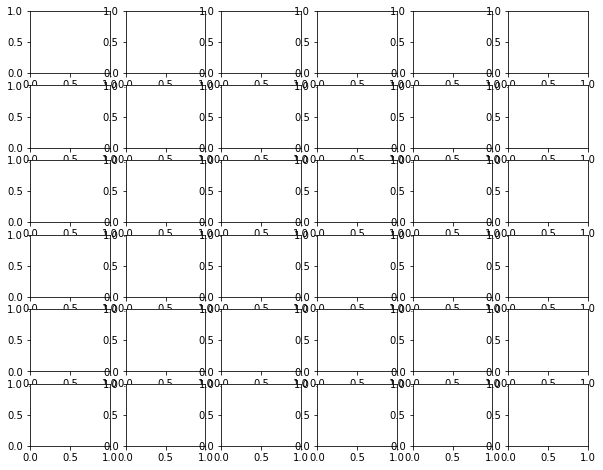

In [10]:
scatterplotmatrix(df_room, figsize=(10, 8))

スカラーだけ使えとのことですので、スカラーのカラムだけ取り出します。

In [13]:
cols = ['rent','size','age']
X = df_room[cols]

これらの列どうしの散布図マトリクスを描きます。values属性で値だけ取り出さないと描けないことに注意しましょう。

(<Figure size 576x576 with 9 Axes>,
 array([[<AxesSubplot:xlabel='X1', ylabel='Count'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='X2', ylabel='X1'>,
         <AxesSubplot:xlabel='X2', ylabel='Count'>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='X3', ylabel='X1'>,
         <AxesSubplot:xlabel='X3', ylabel='X2'>,
         <AxesSubplot:xlabel='X3', ylabel='Count'>]], dtype=object))

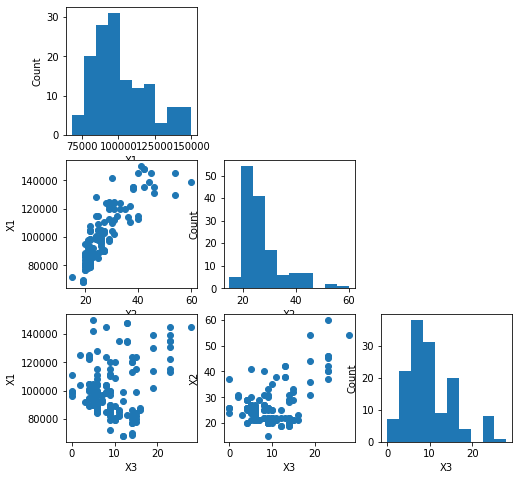

In [23]:
scatterplotmatrix(X.values)

一方で、**Seaborn**を使えば、データフレームをそのまま使えます。カテゴリー変数を除く必要はありません。自動的に除いて処理されます。

Seabornはsnsという名前でインポートするのが慣例です。

In [4]:
import seaborn as sns

Seabornのpairplot()関数を用いて散布図を描きます。

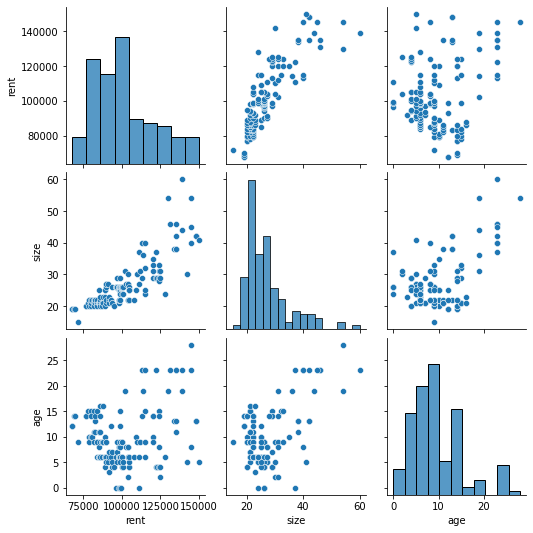

In [25]:
sns.pairplot(df_room)

駅からの近さで色分けしてみます。散布図をpairplot()関数で書くときに、どのカテゴリ変数で色分けしたいかをhue属性で指定します。

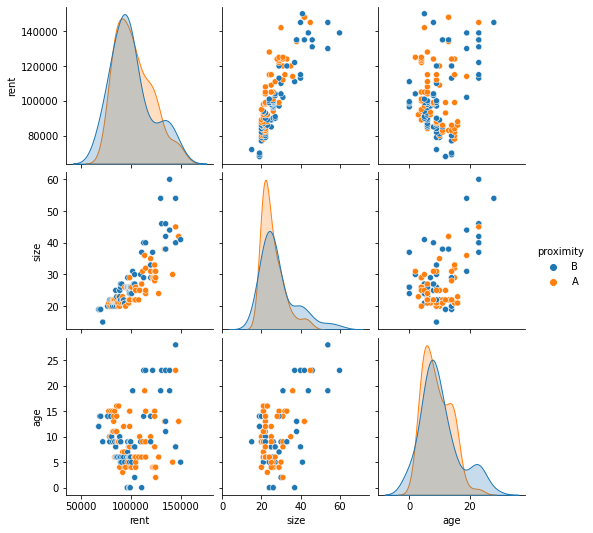

In [27]:
sns.pairplot(df_room, hue='proximity')

間取りで色分けしてみます。

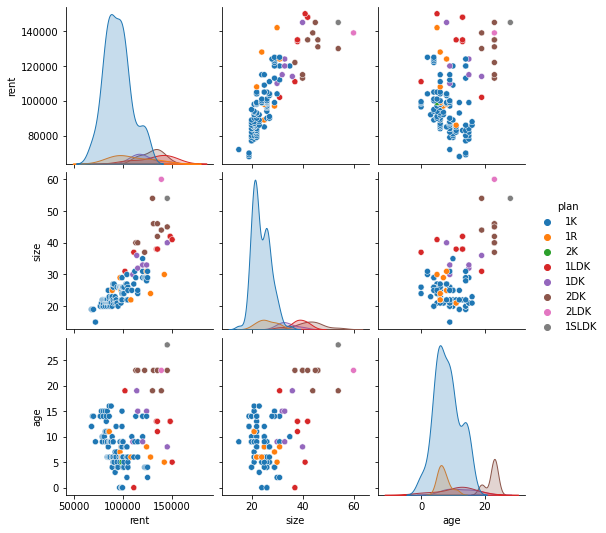

In [28]:
sns.pairplot(df_room, hue='plan')

部屋の向きで色分けします。

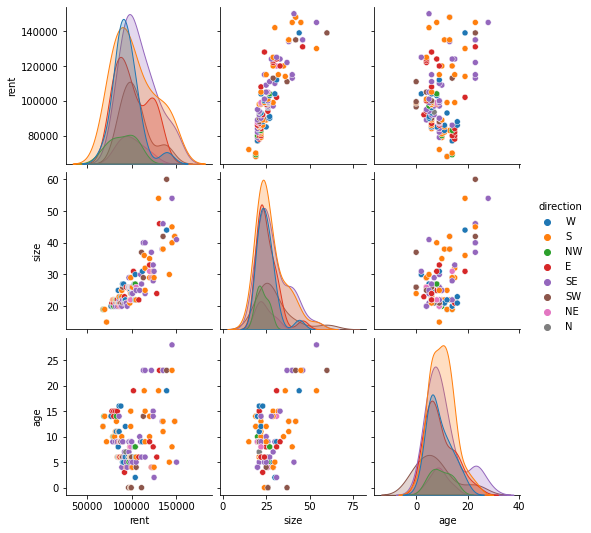

In [29]:
sns.pairplot(df_room, hue='direction')

### 共分散

相関の強さを数値化する方法のひとつに、相関係数（ピアソンの相関係数）があります。それを計算するためには、「**共分散**」を計算する必要があります。

変数$x$と$y$のペア$(x_i, y_i)$が$(x_1,y_1)$から$(x_n, y_n)$まで$n$個あるとします。次に示すような形で計算できる**共分散**$s_{xy}$は、変数$x$と$y$がそれぞれの平均$\bar{x}$, $\bar{y}$から互いに同じ方向あるいは正反対の方向に変動することが多いほど絶対値が大きくなります。同じ方向に動く傾向があれば正の値に、反対方向に動く傾向があれば、負の値に、それぞれ、絶対値が大きくなります。

$$s_{xy} = \frac{1}{n}\{(x_1 - \bar{x})(y_1 - \bar{y})+(x_2 - \bar{x})(y_2 - \bar{y})+ ... +(x_n - \bar{x})(y_n - \bar{y})\}$$ $$= \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})$$

そして、$x$と$y$とが**独立**ー互いにてんでばらばらの方向に動くーの場合$s_{xy}$は$0$になります。

### 相関係数

**共分散**$s_{xy}$を、$x$の**標準偏差**$s_x$と$y$の**標準偏差**$s_y$で割ることで、この値は$-1$と$1$との間になり、正規化されます。これを**相関係数**（**ピアソン**の相関係数）$r_{xy}$といいます。

$$r_{xy} = \frac{s_{xy}}{s_x s_y} = \frac{1}{n}\sum_{i=1}^n\frac{(x_i - \bar{x})}{s_x}\frac{(y_i - \bar{y})}{s_y}$$

そして$s_x$も$s_y$も分母が$\sqrt{n}$ですから、
$$r_{xy}= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}$$

$x$と$y$が同じ方向にいっしょに動く傾向が強ければ$r_{xy}$は$1$に近くなり、反対方向に動く傾向が強ければ、$r_{xy}$は$-1$に近くなります。

それでは、家賃、広さ、築年数の間の相関係数を求めましょう。ペアは３種類ありますから、相関係数も３個できます。  
相関係数は、Pandasデータフレームの.corr()メソッドで求めます。

In [42]:
corr_room = df_room.corr()
print(corr_room)

          rent      size       age
rent  1.000000  0.841193  0.245452
size  0.841193  1.000000  0.515945
age   0.245452  0.515945  1.000000


Seabornのheatmap()関数で「ヒートマップ」として表示しましょう。

<AxesSubplot:>

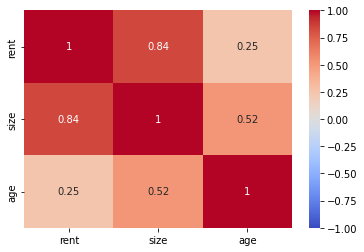

In [50]:
sns.heatmap(corr_room, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

これからわかるように、これら３つの変数の間にはどれの間にも正の相関があります。そしてもっとも強いのは広さと家賃との関係です。

気になるのは、築年数と家賃との間に正の相関があることです。古いほど、家賃が高くなる傾向です。これは、直観と反しますね。   
その関係から、広さの影響を取り除く必要があります。上の表からわかるように、築年数と広さとの間には正の相関があるからです。つまり、古い→広い→高い、という関係が含まれているかもしれません。

家賃と広さとの相関係数を$r_{xy}$、家賃と築年数との相関係数を$r_{xz}$、広さと築年数との相関係数を$r_{yz}$とします。広さの影響を除いた、築年数と家賃との相関係数$r_{xz-y}$を、計算するには、次のようにします。

$$r_{xz-y} = \frac{r_{xz} - r_{xy}r_{yz}}{\sqrt{1 - r_{xy}^2}\sqrt{1 - r_{yz}^2}}$$

この相関係数$r_{xz-y}$を**偏相関係数**といいます。  

実際に計算してみましょう。

In [44]:
rxy = corr_room.loc["rent","size"]
print(rxy)

0.8411926135904368


In [46]:
rxz = corr_room.loc["rent","age"]
print(rxz)

0.24545151007620591


In [48]:
ryz = corr_room.loc["size","age"]
print(ryz)

0.5159447489463378


In [49]:
rxz_y = (rxz - rxy*ryz)/(np.sqrt(1 - rxy**2)*np.sqrt(1 - ryz**2))
print(rxz_y)

-0.4070703491024938


このように、広さの影響を除いたあとの、家賃と築年数との偏相関係数は負になりました。同じ大きさの部屋であるなら、古い物件ほど家賃が安いことになります。

#### 例題

次の表は、10人の身長・体重の観察値です。身長と体重の関係の散布図を表示し、相関係数を求めましょう。

|身長|158|167|150|169|160|159|152|162|156|164|
|--|--|--|--|--|--|--|--|--|--|--|
|体重|55|57|45|64|50|60|53|49|44|57|

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

データは次の通りです。

In [2]:
height = np.array([158,167,150,169,160,159,152,162,156,164])
weight = np.array([55,57,45,64,50,60,53,49,44,57])

データフレームをつくります。関数pandas.DataFrame()の引数が辞書型であることに注意してください。

In [3]:
df_hw = pd.DataFrame({'Height':height,'Weight':weight})

In [4]:
df_hw

,Height,Weight
0,158,55
1,167,57
2,150,45
3,169,64
4,160,50
5,159,60
6,152,53
7,162,49
8,156,44
9,164,57


散布図を描きましょう。まず、Seabornでペアプロットとして描きましょう。これの利点は各変数単独での分布もわかることです。

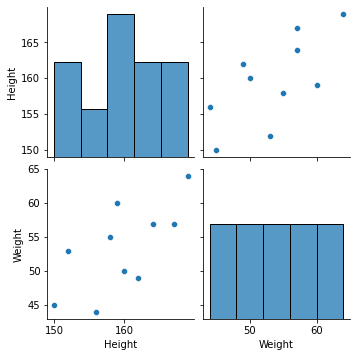

In [20]:
sns.pairplot(df_hw)

単純に、Matplotlibで描いてみましょう。

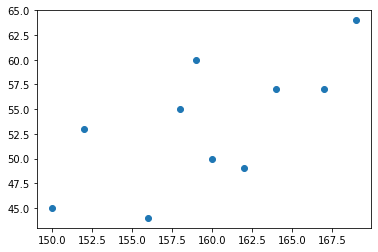

In [21]:
plt.scatter(height,weight)

Pandaデータフレームのplot()メソッドでも描けます。

<AxesSubplot:xlabel='Height', ylabel='Weight'>

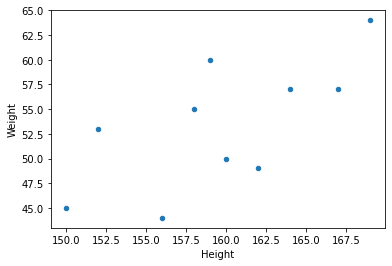

In [30]:
df_hw.plot('Height','Weight',kind='scatter')

相関係数を求めましょう。

In [5]:
corr_hw = df_hw.corr()

In [6]:
corr_hw

,Height,Weight
Height,1.000000,0.681979
Weight,0.681979,1.000000


上の表より、0.682とわかります。

上の散布図を見ると、直線関係が見えてくると思います。それを定量的に示すのが、次に取扱う回帰分析です。

## 回帰分析

### 独立変数と従属変数

回帰分析は、ある変数xから別の変数yの値を予測するために行います。前提として、xとyは対等ではなく、xを原因としてyが起こるというような、方向性のある関係を想定しています。

例えば部屋の広さ$x$[$m^2$]で家賃$y$[円]が説明できると考えます。このとき、説明するほうの変数$x$を説明変数（独立変数、予測変数などともいう）、説明されるほうの変数$y$を応答変数（目的変数、従属変数、被説明変数などともいう）といいます。

### 回帰直線

部屋の大きさを$x$, 家賃を$y$とおき、その間に$$y = \alpha + \beta x$$という直線関係を考え、部屋の大きさ$x$から家賃$y$を予測します。この直線を$y$の$x$に対する回帰直線（regression line）とよび、$\alpha$と$\beta$を回帰係数（regression coefficient）とよびます。  
この回帰直線を散布図のデータと対応させ、最もよくあてはまる回帰係数を推定します。

#### 最小二乗法

そのような回帰直線はどのようにして求めるのでしょうか。仮に$\alpha$, $\beta$をある値$\hat{\alpha}$, $\hat{\beta}$にしたとき、$x_i$に対する$y_i$の**予測値**$\hat{y}_i$は、$\hat{y}_i = \hat{\alpha} + \hat{\beta}x_i$となります。

観測値の実際の値$y_i$と回帰直線で予測した値$\hat{y}_i$との差$e_i = y_i - \hat{y}_i$を**残差residual**と呼びます。つまり予測誤差です。

観測値は$n$個ですから、残差の二乗和（残差平方和）は、$\hat{\alpha}$と$\hat{\beta}$の関数として、

$$S_{(\hat{\alpha},\hat{\beta})} = \sum_{i = 1}^n e_i^2 = \sum_{i = 1}^n (y_i - \hat{y}_i)^2-  
= \sum_{i = 1}^n\{y_i - (\hat{\alpha} + \hat{\beta} x_i) \}^2$$

のように表され、これを最小にするような$\hat{\alpha}$と$\hat{\beta}$を求めればよいことになります。

$S_{(\hat{\alpha},\hat{\beta})}$は２つのパラメータ$\hat{\alpha}$と$\hat{\beta}$の２次関数で、最小値が存在しますから、$\hat{\alpha}$と$\hat{\beta}$で偏微分し$0$に等しいとすると、次の２つの方程式ができます。

$$n\hat{\alpha} + \hat{\beta}\sum x_i = \sum y_i$$

$$\hat{\alpha}\sum x_i + \hat{\beta}\sum x_i^2 = \sum x_i y_i$$

これらは、$\hat{\alpha}$と$\hat{\beta}$の連立１次方程式です。そして、

$$\hat{\beta} = \frac{\sum(y_i - \bar{y})(x_i - \bar{x})}{\sum (x_i - \bar{x})^2} = \frac{s_{xy}}{s_{xx}} = r_{xy}\frac{\sqrt{s_{yy}}}{\sqrt{s_{xx}}} = r_{xy}\frac{s_y}{s_x}$$

$$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$$

となります。なお、$s_{xx}$, $s_{yy}$はそれぞれ$x$, $y$の分散を意味します。同様に、$s_{xy}$は$x$と$y$の共分散です。

また、$s_x$, $s_y$は$x$, $y$の標準偏差です。

上の式から、次のような関係がわかります。
- 回帰係数$\hat{\beta}$は、$x$, $y$の共分散と$x$の分散の比である。
- 回帰係数$\hat{\beta}$は同時に、$x$, $y$の相関係数に$y$と$x$の標準偏差の比をかけたものでもある。

このような**最小二乗法**による$\hat{\alpha}$, $\hat{\beta}$の解には次のような特徴があります。

- 予測値$\hat{y}_i = \hat{\alpha} + \hat{\beta} x_i$の平均は観測値$y_i$の平均と等しい。
- 残差$e_i = y_i - \hat{y}_i$の平均は$0$となる。
- 回帰直線は点$(\bar{x}, \bar{y})$を通る。
- 予測値$\hat{y}_i$と残差$e_i$との相関係数は0である。
- $y$の**変動の大きさ**を表す**平方和$S_y$は、回帰による平方和$S_R$と残差平方和$S_e$とに分解できる**。つまり、$S_y = S_R + S_e$

そして、$y$の平方和において回帰による平方和の割合、すなわち$$R^2 = \frac{S_R}{S_y}$$を、**決定係数**といいます。これが大きい（ただし最大値は1）ほど、$y$の変動のうち回帰直線で説明できる部分の割合が大きくなります。

#### 回帰モデルの推定と検定

- $F$統計量：$S_R$と$S_e$を比較する指標です。帰無仮説$H_0$を、「すべての従属変数の回帰係数が0」としてF統計量を計算します。$F$統計量が大きいほど、その実現確率は小さくなります。
- $F$統計量の確率：$H_0$のもとで、計算されたような値を得る確率です。有意水準と比較して回帰の優位性の検定に用います。
- $t$統計量：$F$統計量のもとで、回帰が有意であると判断されたとき、個別の回帰係数の信頼区間を求めたり有意性の検定をしたりするために用います。回帰係数が0であるという帰無仮説のもとで計算された$\hat{\beta}$の値から計算します。大きいほど、0から外れます。
- $P-$値：上記帰無仮説のもとで、$t$統計量がその値よりも極端な値をとる確率です。

### Statsmodelsを使った回帰分析（単回帰分析）

それでは、家賃データから、広さと家賃との関係を表す回帰直線を求めましょう。

statsmodelsのモジュールをインポートします。

In [31]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

データは、すでに読み込んである、df_roomという名前のデータフレームです。  
説明変数と目的変数を指定します。説明変数(x)はsize, 目的変数(y)はrentです。

その前に関係を確認しておきます。散布図は、Pandasデータフレームのplot()メソッドで描けます。

<AxesSubplot:xlabel='size', ylabel='rent'>

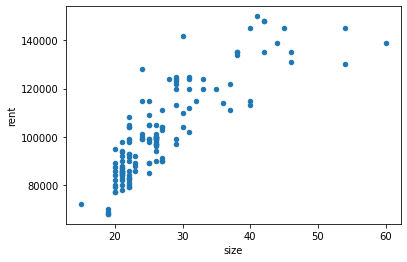

In [27]:
df_room.plot('size','rent', kind='scatter')

Pandasデータフレームのlocメソッドで列を取り出します。

In [6]:
x = df_room.loc[:,'size']
y = df_room.loc[:,'rent']

切片を計算させるために定数項を設定します。  
**注意**：もし切片を必要とする線形回帰のモデル式ならば必ず必要な操作で、これを入れないと正しく回帰式が作成されません。

In [7]:
X1 = sm.add_constant(x)

上の操作によって、次に示すように、すべてのデータに先頭項目として定数１が加わりました。  

In [71]:
X1

,const,size
0,1.0,19
1,1.0,19
2,1.0,19
3,1.0,19
4,1.0,15
...,...,...
135,1.0,40
136,1.0,54
137,1.0,42
138,1.0,42


モデルを設定します。OLSとは、最小二乗法のことです。

In [8]:
model_1 = sm.OLS(y,X1)

回帰分析を実行します。

In [9]:
result_1 = model_1.fit()

結果の詳細を表示します。

In [76]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     334.0
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.14e-38
Time:                        15:42:46   Log-Likelihood:                -1493.4
No. Observations:                 140   AIC:                             2991.
Df Residuals:                     138   BIC:                             2997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.579e+04   3179.976     14.400      0.0

表の解説の前に、回帰直線を表示しましょう。パラメータ$\hat{\alpha}$, $\hat{\beta}$（それぞれ、y切片と傾き）は結果から次のように取り出されます。解説より先に、上の表でいうと、それぞれ、const行のcoef, size行のcoefにあたります。これらの値は、回帰直線をプロットするために使います。

In [78]:
a_1 = result_1.params[0] #alpha
b_1 = result_1.params[1] #beta

ではデータをプロットし、回帰直線を表示します。

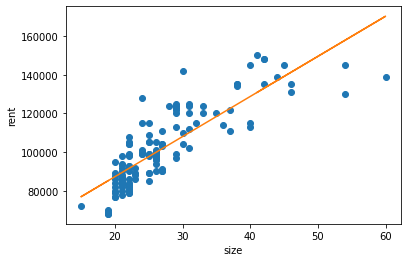

In [84]:
plt.plot(x, y,"o")
plt.plot(x,a_1 + b_1*x)
plt.xlabel('size')
plt.ylabel('rent')
plt.show()

上の表の内容を説明します。まず再掲します。

In [85]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     334.0
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.14e-38
Time:                        16:06:50   Log-Likelihood:                -1493.4
No. Observations:                 140   AIC:                             2991.
Df Residuals:                     138   BIC:                             2997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.579e+04   3179.976     14.400      0.0

項目をかいつまんで説明します。  
- Dep. Variable: rent       ：従属変数は'rent'です。  
- Model: OLS                ：モデル化のために最小二乗法（Ordinary Least Square）を使いました。  
- No. Observations: 140     ：データの数です。  
- Df Residuals: 138         ：データの自由度です。  
- Df Model: 1               ：モデルの自由度です。$\hat{\alpha}$と$\hat{\beta}$の２つの変数なので、2-1 = 1。  
- R-squared: 0.708          ：上で示した決定係数$R^2$が0.708です。  
- Adj. R-squared: 0.705     ：重回帰分析のときに効いてくる指標です。説明変数を増やすとペナルティとして$R^2$を減らされます。   
- F-statistics　　　　　　  ：データとモデルの自由度を考慮して、$S_R$と$S_e$を比較する指標です。大きいほど帰無仮説（回帰係数が0）のもとで稀な事象となります。
- Prob(F-statistics)　　　　：帰無仮説のもとで上記F-statistics以上の値を得る確率です。
- AIC: ：モデルへの当てはまりの良さを表します。小さいほど良いとされています。  
- const とsizeのcoef: ：上述した、回帰係数です。  
- std err: ：回帰係数の標準誤差です。  
- t: ：帰無仮説のもとでのt統計値です。  
- P>|t| ：P-値です。統計値がこの値よりも極端な値となる確率です。。  
-  \[0.025      0.975\]: ：回帰係数$\hat{\beta}$の95%信頼区間です。

#### 例題

さきほどの、身長と体重との関係について、次のステップで回帰分析を行いましょう。

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

データフレームdf_hwからxとyに相当するもの（それぞれ身長hと体重w）をデータフレームから取り出しましょう。.loc[;,列名]メソッドで取り出します。

In [10]:
h = df_hw.loc[:,'Height']

In [13]:
w = df_hw.loc[:,'Weight']

身長hに定数項を設定しましょう。sm.add_constant()関数を用います。

In [16]:
h1 = sm.add_constant(h)

モデルを設定しましょう。sm.OLS(y,x)関数を使います。xには必要に応じて定数項が付加されている必要があります。

In [17]:
model_hw = sm.OLS(w,h1)

回帰分析を実行して、結果の詳細を表示しましょう。

In [18]:
result_hw = model_hw.fit()

In [20]:
print(result_hw.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     6.956
Date:                Fri, 01 Jul 2022   Prob (F-statistic):             0.0298
Time:                        01:25:52   Log-Likelihood:                -29.175
No. Observations:                  10   AIC:                             62.35
Df Residuals:                       8   BIC:                             62.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.8937     43.743     -1.415      0.1

E:\PythonUSB\PythonUSB\Python\python-3.9.9\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$R^2$が0.465と、それほどは高くはないことがわかります。身長以外の要因もかなり関係するであろうことがわかります。

しかし、$\beta$つまり身長$h$の係数は正で、$P-$値は0.030つまり5%水準で有意で、95%信頼区間は正の範囲にあります。要するに、身長は体重に関係していると言ってよいことがわかります。

回帰モデルのパラメータを抽出しましょう。

In [22]:
a_2 = result_hw.params[0]
a_2

-61.893744387907816

In [24]:
b_2 = result_hw.params[1]
b_2

0.7219395390601615

データをプロットし、回帰直線を図示しましょう。

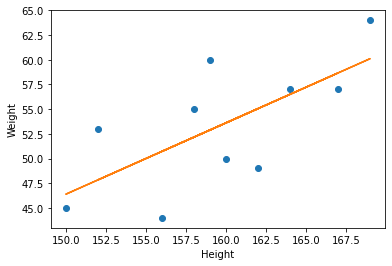

In [25]:
plt.plot(h, w,"o")
plt.plot(h,a_2 + b_2*h)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### 補足：線形モデルの妥当性

上に示したサマリーの、下のほうの欄は、線形モデルを使うことの適切性についての指標です。

Omnibus, Prob(Omnibus): ：Omnibusの値が小さく、Prob(Omnibus)の値が1に近いほど、残差の分布が正規分布に近くなります。  
とはいえ、具体的にどれだけであるべきかについての決まりはありません。  
そこで、残差をヒストグラムにして調べてみます。

(array([ 2.,  0., 12., 32., 36., 30., 13., 13.,  0.,  2.]),
 array([-31300.17283685, -24774.73636911, -18249.29990138, -11723.86343365,
         -5198.42696591,   1327.00950182,   7852.44596955,  14377.88243729,
         20903.31890502,  27428.75537275,  33954.19184049]),
 <BarContainer object of 10 artists>)

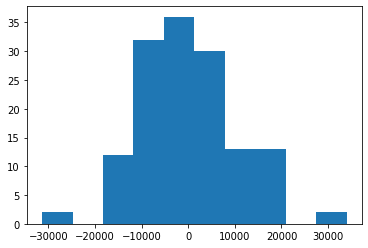

In [92]:
plt.hist(result_1.resid)

残差のskewness（歪度：正に大きいほど右すそが大きく、負に大きいほど左すそが大きい）とkurtosis（尖度：大きいほど分布がとがる）は、それぞれ、SkewとKurtosisに表されています。

次に、sizeと残差の関係を散布図で見てみましょう。

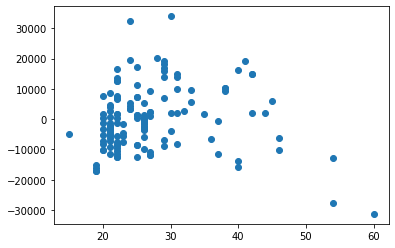

In [90]:
plt.scatter(x,result_1.resid)

sizeが大きくなるほど残差の絶対値が大きくなる傾向が見て取れます。

### さらに補足：lmdiagを使った線形モデルの妥当性の検討

lmdiagというツールで、線形モデルの妥当性を検討することができます。

In [94]:
pip install lmdiag

Note: you may need to restart the kernel to use updated packages.Collecting lmdiag

     ---------------------------------------- 1.6/1.6 MB 7.8 MB/s eta 0:00:00


You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


     -------------------------------------- 985.1/985.1 KB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 68.2/68.2 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools-scm
    Found existing installation: setuptools-scm 6.3.2
    Uninstalling setuptools-scm-6.3.2:
      Successfully uninstalled setuptools-scm-6.3.2


In [10]:
import lmdiag

lmdiag.resid_fit()関数で、理想的な残差からどの程度乖離しているか視覚的にチェックすることができます。  
出力されるグラフは、横軸が予測値、縦軸が残差です。

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

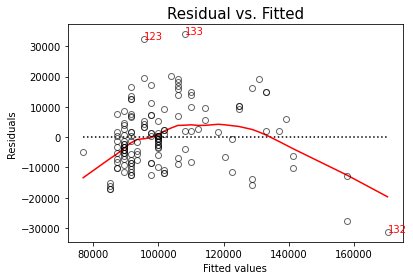

In [12]:
lmdiag.resid_fit(result_1)

また、QQプロットというものも行われます。Qとは、quantile（分位数）のことです。これは、横軸に正規分布の理論値を、縦軸に、標準化残差（standardized residuals）をプロットしたものです。標準化残差とは平均0，分散1に変換した残差のことです。

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

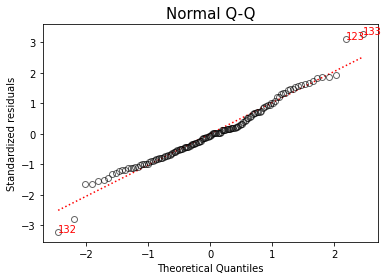

In [12]:
lmdiag.q_q(result_1)

この結果が、上の赤い点線で示した45°の線上に乗っていれば残差は正規分布に従って分布しています。しかし、多くの点がそこから外れていると、残差が正規分布するといえなくなり、線形モデルの適用を見直す必要があります。

StatsmodelsにもQQプロットをする機能があります。

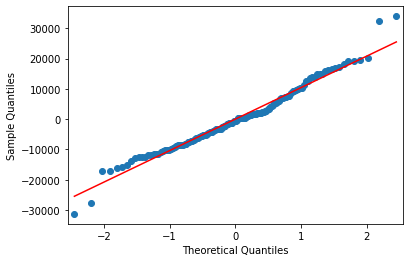

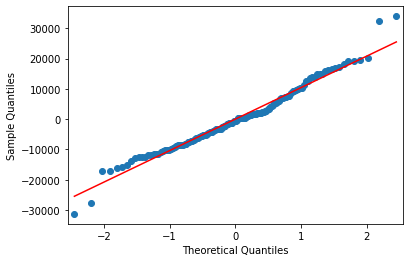

In [13]:
sm.qqplot(result_1.resid,line="s")

## 重回帰分析

これまで、説明変数が１個の単回帰分析を扱ってきました。説明変数が２個以上の場合、重回帰分析といいます。

説明変数が$p$個のとき、線形重回帰モデルは、$$y_i = \alpha + \beta_1 x_i + \beta_2 x_i + ... + \beta_p x_i + e_i$$ ただし$i = 1, 2, ... n$ ($n$はデータの数)となります。

データから、当てはめ値$\hat{\alpha}, \hat{\beta}_1, ,\hat{\beta}_2, ... \hat{\beta}_p$を求めることができます。

### Statsmodelsを用いた線形重回帰分析

#### 量的変数を加えた場合

家賃の線形モデルに築年数を加えてみます。

In [15]:
x_2 = df_room.loc[:,['size','age']]
y = df_room.loc[:,'rent']

In [16]:
X2 = sm.add_constant(x_2) #定数項の設定（先頭に値１のカラムを加える）

In [18]:
model_2 = sm.OLS(y,X2) # モデルの設定

In [19]:
result_2 = model_2.fit() # 重回帰分析の実行

In [20]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.07e-42
Time:                        09:41:44   Log-Likelihood:                -1480.7
No. Observations:                 140   AIC:                             2967.
Df Residuals:                     137   BIC:                             2976.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.552e+04   2915.615     15.613      0.0

この分析から、予測式は、家賃\[円\] = 45523.0 + 2402.2 x 広さ + (-892.5) x 築年数  
となります。どちらの説明変数もt値の絶対値が十分大きく、従ってp値が0に近く、十分に有意です。  
広さのみを説明変数とした場合とくらべて、Adjusted R-squaredの値が大きいのがわかります。

#### 質的変数（ダミー変数）を加えた場合

家賃データで、近さproximityは、Aのときに「近い」、Bのときに「遠い」を表します。そこで、Aに0を、Bに1を割り当てることで質的変数をあたかも量的変数のように扱うことができます。このような変数のことを**ダミー変数**といいます。

df_roomデータフレームから説明変数としてsizeとproximityを選び、proximityをダミー変数化します。  
pandas.get_dummies()関数を用います。

In [24]:
pd.get_dummies(df_room[['size','proximity']])

,size,proximity_A,proximity_B
0,19,0,1
1,19,0,1
2,19,0,1
3,19,0,1
4,15,0,1
...,...,...,...
135,40,0,1
136,54,0,1
137,42,1,0
138,42,1,0


上がその結果得られるデータフレームです。問題は、近さの指標としてproximity_Aかproximity_Bのどちらを使うかです。  
遠いと家賃が下がることを想定しているので、遠いとフラグが立つほう、つまり、proximity_Bを選びます。
説明変数としてsizeとproximity_Bを採用し、また、先頭に定数カラムをつくります。  
次の命令では、loc[]の使い方にも注意してください。

In [34]:
x_3 = pd.get_dummies(df_room[['size','proximity']]).loc[:,['size','proximity_B']]

In [35]:
x_3

,size,proximity_B
0,19,1
1,19,1
2,19,1
3,19,1
4,15,1
...,...,...
135,40,1
136,54,1
137,42,0
138,42,0


In [36]:
X3 = sm.add_constant(x_3)

モデルを作り、重回帰分析を行い、結果を表示します。

In [37]:
model_3 = sm.OLS(y,X3)

In [38]:
result_3 = model_3.fit() 

In [39]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.55e-43
Time:                        10:56:39   Log-Likelihood:                -1479.6
No. Observations:                 140   AIC:                             2965.
Df Residuals:                     137   BIC:                             2974.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.757e+04   2910.072     16.348      

この分析から、予測式は、家賃\[円\] = 47570 + 2177.3 x 広さ + (-8934.2) x 近さ  
となります。どちらの説明変数もt値の絶対値が十分大きく、従ってp値が0に近く、十分に有意です。  
広さのみを説明変数とした場合とくらべて、Adjusted R-squaredの値が大きいのがわかります。

以上から、２つめのモデル－広さと築年数－でも、３つめのモデル－広さと駅からの近さ－でも家賃をよく説明できると考えられます。

### 重回帰分析の残差分析

単回帰分析と同様に、残差分析ができます。

In [41]:
import lmdiag

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

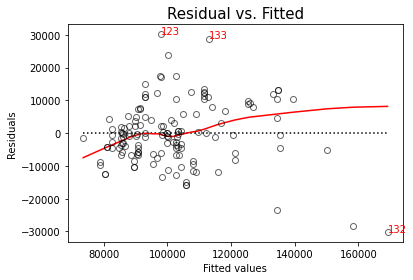

In [42]:
lmdiag.resid_fit(result_2)

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

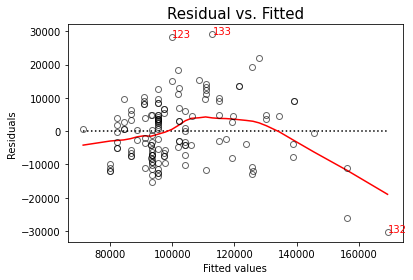

In [43]:
lmdiag.resid_fit(result_3)

予測値－残差プロットでは、モデル２－広さと築年数－もモデル３－広さと駅からの近さ－のどちらも単回帰分析のときより良さそうに見えます。

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

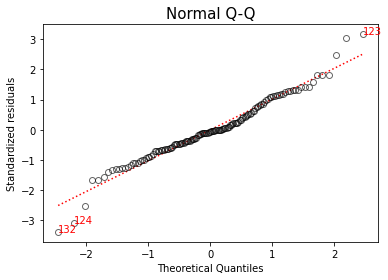

In [44]:
lmdiag.q_q(result_2)

<module 'matplotlib.pyplot' from 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\lib\\site-packages\\matplotlib\\pyplot.py'>

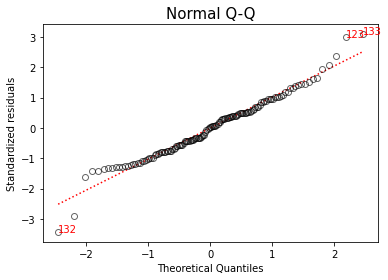

In [45]:
lmdiag.q_q(result_3)

QQプロットでは、モデル２もモデル３もモデル１と同様に収まっているように見えます。

## （補足）分散分析

### 対象とするデータと必要とする理由

分散分析は、次の例のように、通常３つ以上のグループ（水準あるいは級とよびます）間で平均値を比較する場合などに用いられます。

|メーカー|製品の耐久時間|平均値|
|--|--|--|
|A|1550, 1590, 1630, 1670, 1760|1640|
|B|1530, 1590, 1600, 1640|1590|
|C|1410, 1550, 1590, 1600, 1610, 1680, 1760|1600|
|D|1440, 1480, 1550, 1610|1520|

このように３つ以上の標本に対して、それらの間での平均値の差に有意性があることを検定するには、２標本の検定を繰り返してはいけません。

なぜなら、検定を繰り返すことで第１種のエラー（$H_0$を棄却すべきでないのに棄却すること）の可能性が高まるからです。

例えば５％水準で検定すると、１回の検定では間違って棄却はされない確率が９５％ですが、３つのグループがあったら３回検定することになりますので、間違って棄却はされない確率は$0.95^3 = 0.857$となり、第１種のエラーの確率は$1 - 0.857 = 0.143$に上がります。

### 基本的な考え方

個々のデータの、全体の平均からの変動を、水準内でのばらつきと、水準の全体平均からの変動とに分解します。後者（水準間のばらつき）が前者（水準内のばらつうき）よりもはるかに大きければ、水準間に平均の有意な差があると判断します。

### 分散分析（１元配置分散分析）のモデル

$i$番目の水準の$j$番目の確率変数を$x_{ij}$とします。これらは平均が$\mu_0$、分散が$\sigma^2$の正規分布を示すとします。  
このとき、$x_{ij}$は次のように表せます。  
$$x_{ij} = \mu_i + \epsilon_{ij}$$

ただし、$i = 1, 2, ..., k$で、$j = 1, 2, ..., n_i$

ここで$\epsilon_{ij}$は誤差項で、平均値0, 分散$\sigma^2$の独立正規分布をするものとします。

さらに、平均値$\mu_i$を$\mu + \alpha_i$と置き換えると、$x_{ij}$は、

$$x_{ij} = \mu + \alpha_i + \epsilon_{ij} $$

(ただし、$\sum \alpha_i = 0$ )と表せます。

このように、$x_{ij}$の変動は２つの効果の結果です。ひとつは、 $\mu$があらわす、すべての変数に共通の効果です。もう１つは、$\alpha_i$が表す、個々の水準$i$の母集団に固有の効果です。これを水準$i$への効果といいます。

### 水準内の分散と水準間の分散

これらの変数の分散からいくつかの$\chi^2$分布がつくれます。前提として、すべての水準が同じ母集団（分散が$\sigma^2$）から出ているものとします。

まず、$x_{ij}$は正規分布し、母分散が$\sigma^2$ですから、全体の平均を$\bar{x}$とすると、$$\frac{\sum\sum(x_{ij} - \bar{x})^2}{\sigma^2} = \frac{V}{\sigma^2} $$は自由度$N - 1$の$\chi^2$分布をします。

同様に、各水準の平均を$\bar{x_i}$とすると、**水準内の分散**に関しては、$$\frac{\sum\sum(x_{ij} - \bar{x_i})^2}{\sigma^2} = \frac{V_1}{\sigma^2}$$は自由度$N - k$の$\chi^2$分布をします。

同様に、**水準間の分散**に関しては、$$\frac{\sum n_i(\bar{x_i} - \bar{x})^2}{\sigma^2} = \frac{V_2}{\sigma^2}$$は自由度$k - 1$の$\chi^2$分布をします。

そして、$\chi^2$変数の期待値はその自由度に等しいので、$V/\sigma^2$, $V_1/\sigma^2$, $V_2/\sigma^2$をそれぞれの自由度で割ったものの期待値は$1$になります。つまり、$V/(N - 1)$、$V_1/(N - k)$、$V_2/(k - 1)$の期待値はどれも$\sigma^2$になります。すなわち、**これらはどれも母分散$\sigma^2$の不偏推定量です**。

### 統計量と検定方法

帰無仮説$H_0$: $\alpha_i = 0$ ($i = 1, 2, ..., k$)  
対立仮説$H_1$: $\alpha_i \ne 0$  (少なくとも$i$の1つの値に対して)  
とします。

上の$V_1/(N - k)$と$V_2/(k - 1)$は互いに独立なので、$H_0$のもとでは、不偏分散の比$$F = \frac{V_2/(k - 1)}{V_1/(N - k)}$$は自由度$k - 1$と$N - k$の$F$分布をします。

そして、片側検定で有意水準を$\alpha$とすれば、$F$を検定統計量として$H_0$の棄却域は、$F > F_\alpha$で与えられます。

#### 例題

上の表で、メーカー間の製品寿命に差があるかどうかを調べます。

In [6]:
import numpy as np
from scipy import stats

In [4]:
maker_a = np.array([1550, 1590, 1630, 1670, 1760])
maker_b = np.array([1530, 1590, 1600, 1640])
maker_c = np.array([1410, 1550, 1590, 1600, 1610, 1680, 1760])
maker_d = np.array([1440, 1480, 1550, 1610])

一元配置分散分析には、scipy.stats.f_oneway()などを用いることができます。

In [9]:
print(stats.f_oneway(maker_a,maker_b, maker_c, maker_d))

F_onewayResult(statistic=1.454222222222222, pvalue=0.26440210657974433)


この$P-$値から、5%水準で有意でないことがわかります。つまり、メーカー間で製品寿命の平均に違いはありません。